# On the existence of Twitter echo chambers

Donald Trump is the president elect of the United States. Some have argued that his victory came as a surprise because of the existence of political echo chambers on social media platforms like Facebook and Twitter. As defined on Wikipedia, an echo chamber is “a metaphorical description of a situation in which information, ideas, or beliefs are amplified or reinforced by communication and repetition inside a defined system.” Because social media algorithms recommend personalized information to the user, a user may receive information that excludes perspectives that do not align with their point of view. 

The goal of this data project is to investigate echo chambers on Twitter, with regards to the recent political election. As the project develops, I will formalize the definition of a Twitter echo chamber, explore its attributes, and develop a generalized method to identify tweets belonging to a political echo chamber.

### Current Research

Most of the research about echo chambers is qualitative. The studies that attempt a quantitative analysis use Twitter data. The attributes of the Twitter platform are convenient for a quantitative analysis of echo chambers. Data is readily available at no cost through Twitter’s Streaming and Rest APIs. The company also provides a convenient method for sharing information through the retweet (RT). This is analogous to an echo in an echo chamber. Furthermore, tweets are limited in the amount of characters that can be sent. This makes large-scale analysis much easier.

One study used machine learning to predict political orientation and measure political homophily on Twitter. The results provide evidence of certain attributes being linked to increased political homophily (see Colleoni Rozza and Arvidsson, 2014). This provides evidence favoring the existence of echo chambers on Twitter, assuming echo chambers are defined by heightened levels of homophily.

In light of the recent election, there has been little if any quantitative analysis of the role that echo chambers played in the election of Donald Trump. Quantifying the impact of echo chambers on the election results is beyond the scope of this project. However, identifying tweets belonging to a political echo chamber will further our understanding of the way information spreads around the internet. Future research can reveal the virtues and follies of echo chambers.

### Twitter Data

I began collecting data using Twitter’s Streaming API on 19 October 2016. Bad JSON data, computer processing errors, or internet deficiencies made continuous data collection unreliable. Instead, data was collected semi-frequently until a few days before election day. From 5 November 2016, I collected every day until election day. On election day, I collected data continuously begining at 6:00 pm until almost 2:00 am on 9 November 2016. Presently, I periodically collect more data during smaller time intervals. Identifying echo chambers using Twitter data is a challenge because echo chambers are time dependent. An echo chamber that exists in a past data set might not exist in a similar data set in the future. The data that this project investigates necessarily involves past, present, and future data associated with keywords used in the API.

Twitter's Streaming API delivers a randomized sample of incoming tweets that contain a keyword chosen by the developer. The tweet data is delivered in JSON format and contains several variables related to the tweet as well as the person who sent the tweet. For convenience, I'll refer to the person who sent the tweet as the user. I chose to collect two sets of tweets, one with the keyword "Trump" and the other with the keyword "Clinton". The tweet data were appended to a file called 'trump.txt' or 'clinton.txt'. Since Donald Trump won the election, the Trump keyword will be the primary keyword used for analysis.

Initially, memory storage was an issue, so I collected a subset of the JSON data. The variables I collected were the time the tweet was sent (Unix timestamp), the number of user followers, the number of user friends, the number of user tweets to date, and the text of the tweet. In order to work more efficiently with the data, I wrote a module to store the data in an object called TwitterCorpus. The module is called `utils.py` and contains other auxiliary functions that create a data processing pipeline. The data can be loaded as demonstrated below.

In [34]:
# import statements
import utils as ut
reload(ut)

<module 'utils' from 'utils.py'>

In [35]:
# load Twitter data with keyword Trump
trumpfile = ut.get_file()
djt = ut.TwitterCorpus(trumpfile)


	Options

            1: trump from lab computer

            2: trump from linux mint

            3: clinton from lab computer

            4: clinton from linux mint


Enter number >> 1
Loading file...

Errors: 0
Time: 11.930316925


In [36]:
# load Twitter data with keyword Clinton
clintonfile = ut.get_file()
hrc = ut.TwitterCorpus(clintonfile)


	Options

            1: trump from lab computer

            2: trump from linux mint

            3: clinton from lab computer

            4: clinton from linux mint


Enter number >> 3
Loading file...

Errors: 0
Time: 6.61476802826


### Data Cleaning

The TwitterCorpus object has a variety of methods for data cleaning and feature extraction. The principle method is the `clean_text` method. It uses regular expressions to go through each tweet and identify and store certain attributes of the tweet as an attribute of the TwitterCorpus object. The method accepts a keyword `remove_vars_from_tweet` which is a boolean variable that determines whether or not to remove the extracted variables from the tweet after they have been stored as a TwitterCorpus attribute. For the purposes of this exposition, the variables will remain in the tweets.

Another method is the `convert_time` method. This takes the Unix timestamp of the tweet and converts it into a `datetime` object which is part of the `python` standard library. This is helpful for time-series analyses performed on the data. These methods are demonstrated below.

In [37]:
djt.clean_text(remove_vars_from_tweet=False)
djt.convert_time()

Cleaning text...
Time: 25.1838760376
Converting time to datetime object...
Time: 6.86721396446


In [38]:
hrc.clean_text(remove_vars_from_tweet=False)
hrc.convert_time()

Cleaning text...
Time: 19.8371999264
Converting time to datetime object...
Time: 5.55952501297


The TwitterCorpus object can also generate pandas `DataFrame` objects of the tweet variable statistics. There were 2,666,819 tweets collected for the Trump data set and 2,124,664 tweets collected for the Clinton data set on or before 9 November 2016. This is demonstrated below along with the count, mean, and standard deviation for each variable.

In [114]:
# Trump data set
djt_df = djt.make_df()
djt_df.sample(5)

,time,usr_fol,usr_n_stat,usr_fri,n_weblinks,n_mentions,n_hashtags,RT
990484,2016-11-06 10:03:22,407.0,14642.0,743.0,0,1,0,1
1544056,2016-11-08 18:04:48,264.0,1473.0,369.0,1,1,0,1
1086904,2016-11-06 10:38:26,616.0,24746.0,365.0,1,1,0,1
484699,2016-11-01 09:45:53,5202.0,49150.0,5572.0,1,2,1,1
570325,2016-11-02 13:11:13,3464.0,189972.0,1160.0,1,2,0,1


In [115]:
# Clinton data set
hrc_df = hrc.make_df()
hrc_df.sample(5)

,time,usr_fol,usr_n_stat,usr_fri,n_weblinks,n_mentions,n_hashtags,RT
526136,2016-11-05 22:24:15,14.0,114.0,55.0,0,1,0,1
1651438,2016-11-08 22:34:25,40.0,4707.0,14.0,1,0,0,0
1897995,2016-11-09 00:00:35,1110.0,24036.0,829.0,0,1,0,1
594779,2016-11-06 13:19:06,766.0,16472.0,775.0,1,1,0,1
1871014,2016-11-08 23:51:13,995.0,27129.0,652.0,0,1,0,1


In [116]:
djt_df.describe()[:3]

,usr_fol,usr_n_stat,usr_fri,n_weblinks,n_mentions,n_hashtags,RT
count,2.666820e+06,2.666820e+06,2.666820e+06,2.666820e+06,2.666820e+06,2.666820e+06,2.666820e+06
mean,5.410199e+03,3.393842e+04,1.394367e+03,5.216130e-01,9.264420e-01,3.717233e-01,7.078468e-01
std,1.487897e+05,9.639829e+04,6.754732e+03,5.960455e-01,7.264585e-01,9.821442e-01,4.547524e-01


In [117]:
hrc_df.describe()[:3]

,usr_fol,usr_n_stat,usr_fri,n_weblinks,n_mentions,n_hashtags,RT
count,2.124665e+06,2.124665e+06,2.124665e+06,2.124665e+06,2.124665e+06,2.124665e+06,2.124665e+06
mean,7.689821e+03,3.625812e+04,1.471804e+03,6.043033e-01,9.179094e-01,4.195010e-01,7.161807e-01
std,1.946381e+05,1.036769e+05,8.176541e+03,6.298784e-01,7.414167e-01,9.671641e-01,4.508503e-01


Each observation corresponds to a tweet. Below are the variable names and their corresponding descriptions:

+ **time**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the date and time the tweet was collected. Time is in standard 24 hour format.

+ **usr_fol**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the number of people following the user

+ **usr_n_stat**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the number of statuses (tweets) to date of the user

+ **usr_fri**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the number of people that the user is following

+ **n_weblinks**&nbsp;&nbsp;&nbsp;&nbsp;the number of URLs in the tweet

+ **n_mentions**&nbsp;&nbsp;&nbsp;&nbsp;the number of people mentioned in the tweet

+ **n_hashtags**&nbsp;&nbsp;&nbsp;&nbsp;the number of hashtags in the tweet

+ **RT**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;whether or not the tweet was a retweet

It is worth noting that the two data sets above have similar summary statistics. Along with these dataframes, data on the actual tweets is also available. The TwitterCorpus object extracts the hashtags and mentions from the text of the tweets. A mention is when the user includes in their tweet the Twitter handle of a different user.

In [43]:
# Tweets from Trump data set
for t in djt.tweets[55:60]:
    print(t)

rt @prisonplanet: must be trump's fault. https://t.co/krxah9wcba

rt @artsnewsoakland: dan savage: discusing trump, misogyny and sexual predators with your daughter: the depressing conversation that https

rt @jpodhoretz: might i suggest a second edition with an updated title: "too motherfucking stupid to succeed" https://t.co/yxm4iuimaz

rt @mikeylangrehr: donald trump has finally freed republicans from having to believe in anything. the gop no longer values truth, integrity

rt @jamillatweets: a billboard in arabic has been put up in michigan which says "donald trump can't read this but it still scares him" http



In [44]:
# Tweets from the Clinton data set
for t in hrc.tweets[55:60]:
    print(t)

rt @juliemartinsvu: 'svu' star mariska hargitay endorses clinton, calls her real 'law &amp; order' candidate - https://t.co/ohfb8qmk19 #googlea

clinton is a rapist song by: the deplorables #clintonisarapist #voterfraud #maga3x @infowars @kthedefused  https://t.co/nljttbvpog

rt @realdonaldtrump: 'trump rally disrupter was once on clinton's payroll' https://t.co/75ollud4si

rt @wikileaks: facebook ceo zuckerberg wanted to meet with clinton campaign to "help his understanding" of "political operations" https://t

rt @hwkuk: @telegraph more anti trump trash from the dt, what am l not surprised, of course obama shines along with clinton in your one sid



In [41]:
print(djt.hashtags[55:60]) # hashtags from Trump data set
print(hrc.hashtags[55:60]) # hashtags from Clinton data set

['#exeterpatch', '#debate2016', '#hillaryclinton', '#nhpolitics', '#nh']
['#podestaemails', '#maga', '#trumpsarmy', '#trumpstrong', '#nobody2016']


In [42]:
print(djt.mentions[55:60]) # mentions from Trump data set
print(hrc.mentions[55:60]) # mentions from Clinton data set

['@rontimes', '@stanveuger', '@aol', '@mitchellvii', '@cnn']
['@prisonplanet', '@jesseberney', '@darren32895836', '@wikileaks', '@wikileaks']


If echo chambers exist in the Trump and Clinton data sets, there may be a difference between tweets and retweets. Below are the tables comparing a selection of summary statistics of tweets and retweets from the Trump data set. Notice that the mean and standard deviation of the usr_fol variable is much smaller for the retweet data set. The retweet data set also has more mentions on average than the tweet data set.

In [122]:
# proportions of retweets for Trump
djt_df[djt_df['RT']==1].describe()[['usr_fol','n_mentions']][:3]

,usr_fol,n_mentions
count,1.887700e+06,1.887700e+06
mean,2.906381e+03,1.142646e+00
std,6.341699e+04,5.283376e-01


In [123]:
# proportions of retweets for Clinton
djt_df[djt_df['RT']==0].describe()[['usr_fol','n_mentions']][:3]

,usr_fol,n_mentions
count,779120.000000,779120.000000
mean,11476.604370,0.402611
std,256866.994864,0.861636


### Visual Analysis

Most of the Twitter data follows a power law. Histograms of the variables show a very severe curve as demonstrated below.

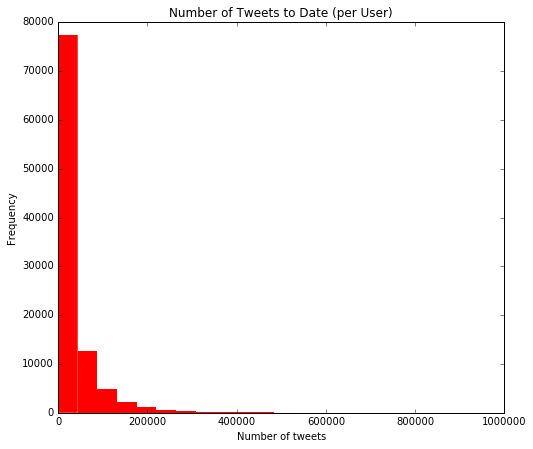

In [140]:
djt_df['usr_n_stat'][1500000:1600000].plot(kind='hist',bins=150,linewidth=0,color='r',figsize=(8,7))
plt.xlim(0,1000000)
plt.xlabel("Number of tweets")
plt.title("Number of Tweets to Date (per User)")
plt.show()

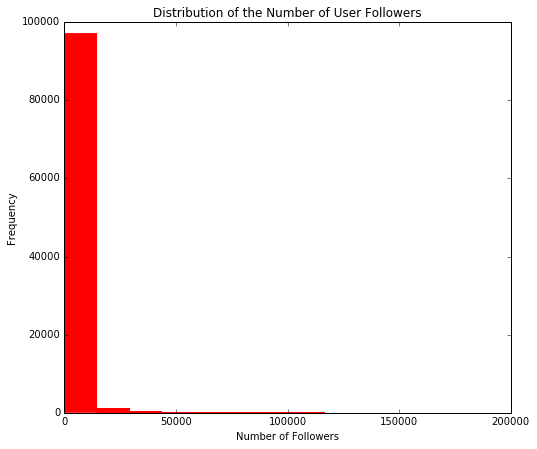

In [141]:
djt_df['usr_fol'][1500000:1600000].plot(kind='hist',bins=2000,linewidth=0,color='r',figsize=(8,7))
plt.xlim(0,200000)
plt.xlabel("Number of Followers")
plt.title("Distribution of the Number of User Followers")
plt.show()

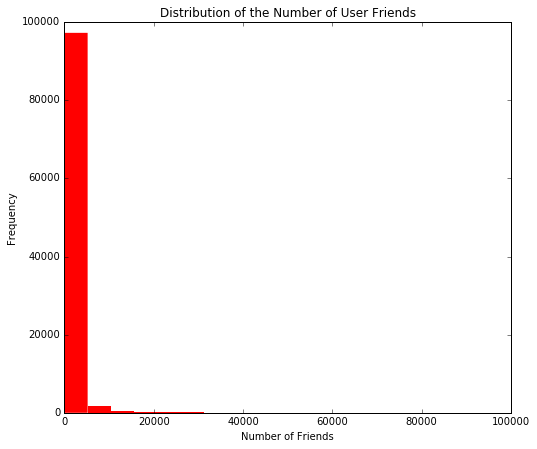

In [142]:
djt_df['usr_fri'][1500000:1600000].plot(kind='hist',bins=150,linewidth=0,color='r',figsize=(8,7))
plt.xlim(0,100000)
plt.xlabel("Number of Friends")
plt.title("Distribution of the Number of User Friends")
plt.show()

Due to the size of the data, rendering visualizations can be computationally expensive. Visualizing a subset of the data will still provide an accurate visualization. In general, the distribution of the variables does not change over time. This means that we can reliably plot a slice of our data set and still get away with understanding what the data look like.

Below are scatterplots representing the number of friends and the number of followers of the Twitter users. A parity line is drawn to help the viewer know where the number of followers equals the number of friends.

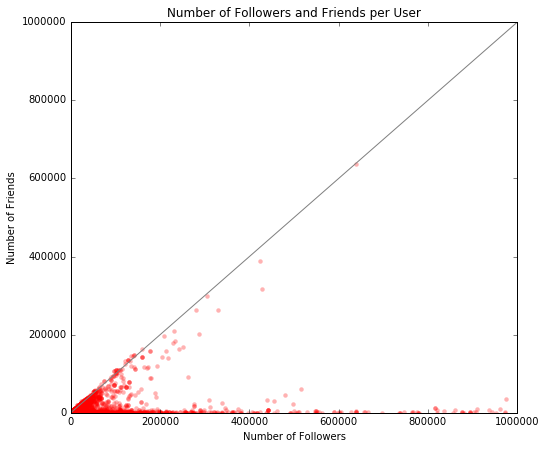

In [134]:
djt_df[1500000:1600000].plot(kind='scatter',x='usr_fol',y='usr_fri',color='r',linewidth=0,alpha=.3,figsize=(8,7))
x = np.linspace(-5,1000000,len(djt_df))
plt.plot(x,x,color='grey')
plt.ylim(-5,1000000)
plt.xlim(-5,1000000)
plt.title("Number of Followers and Friends per User")
plt.xlabel("Number of Followers")
plt.ylabel("Number of Friends")
plt.show()

This first scatterplot gives good intuition but leaves out some data points. I manually adjusted the axes and excluded some data points. The second scatterplot below includes all of the data points. Again, the grey parity line shows where the number of followers equals the number of friends.

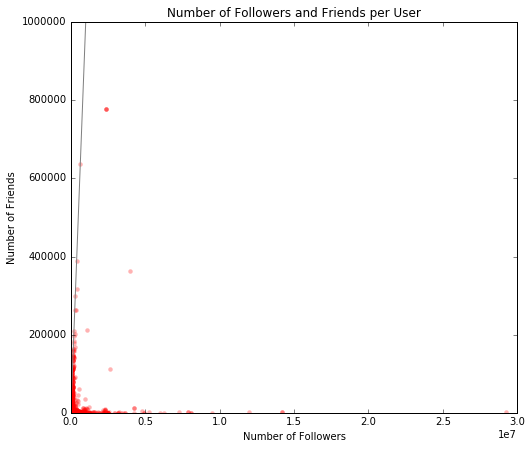

In [138]:
djt_df[1500000:1600000].plot(kind='scatter',x='usr_fol',y='usr_fri',color='r',linewidth=0,alpha=.3,figsize=(8,7))
x = np.linspace(-5,1000000,len(djt_df))
plt.plot(x,x,color='grey')
plt.ylim(-5,1000000)
plt.xlim(-5,30000000)
plt.title("Number of Followers and Friends per User")
plt.xlabel("Number of Followers")
plt.ylabel("Number of Friends")
plt.show()

The second scatterplot shows that users either have about as many friends as followers, or almost no friends and many followers. Note the scale on the x-axis. Possible reasons for this appearance could be the presence of companies, Twitter bots, or information sources which are likely to have many followers but few friends. The scatterplot below plots the same data on a log-log scale with the same parity line. There is a clear ceiling on the number of friends just under the 1000 mark on the y-axis for users who have fewer than 1000 followers. As seen above, there is more variance in the number of followers than in the number of friends.

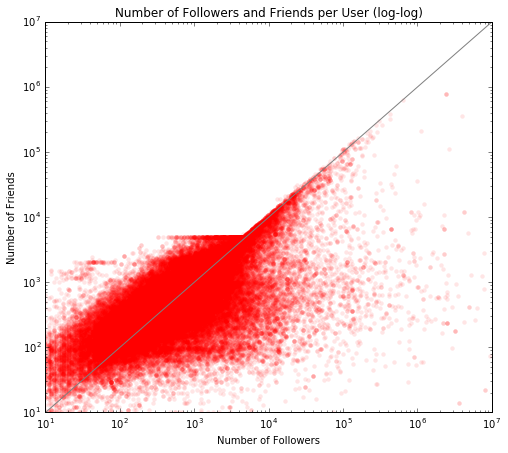

In [136]:
djt_df[1500000:1600000].plot(kind='scatter',x='usr_fol',y='usr_fri',color='r',linewidth=0,alpha=.1,figsize=(8,7))
x2 = np.linspace(-5,10000000,len(djt_df))
plt.plot(x2,x2,color='grey')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**1,10**7)
plt.ylim(10**1,10**7)
plt.title("Number of Followers and Friends per User (log-log)")
plt.xlabel("Number of Followers")
plt.ylabel("Number of Friends")
plt.show()

Visualizing text is a challenge. Fortunately, the analysis is not limited to the content of the tweet. Connections between Twitter users forms a network. I created two network representations of Twitter data with keywords Trump and #MAGA. The hashtag is an acronym for Trump’s slogan “Make America Great Again”. The visualizations were created in D3.js which is a JavaScript library widely considered to be the industry standard for data visualizations. The interactive networks are online at [www.derekmiller.info](http://www.derekmiller.info). The visualization simulates a force-directed graph structure. In this case, the nodes represent Twitter handles such as @realDonaldTrump. If @realDonaldTrump mentioned @dgmllr in a tweet, then they would share a connection represented by a grey line connecting the nodes. The graph uses an algorithm to place similar nodes near each other and unrelated nodes farther apart.

![jpg](trumpmaga.jpg)

Notice the differences between the two visualizations. For the visualization with the keyword Trump, the network seems mostly disconnected. Some clusters exist but they are small and spread out. Contrast this with the visualization of the network with keyword #MAGA. A tight, relatively dense cluster makes up the majority of the entire network. One possible explanation for this difference is that the keyword Trump is a neutral term on average. There are many people who dislike Donald Trump and many others who like him. Both are equally likely (or unlikely) to mention Trump in a tweet. This leads to a disconnected network. The keyword #MAGA is much less likely to be as neutral on average as the Trump keyword. A Trump opponent is much less likely to use the Trump-branded hashtag.

### Conclusion

All of the data described above comes from Twitter. This means that the data is possibly biased. Other social media sites such as Facebook or LinkedIn may describe different users. The results of this project cannot be extrapolated beyond the Twitter platform. However, for the purpose of this project, Twitter data will provide a solution to identifying political echo chambers. I have addressed only a few of many noteworthy observations that still need exploring. For example, what are the most common topics associated with various hashtags or users? How do keyword networks evolve over time? Is there a difference between users who retweet a lot versus those who don't retweet very often?

I hope to answer these questions and more as I learn about machine learning algorithms. Feature engineering and unsupervised algorithms will continue to bring structure to the data set. Finding consistencies over time will help identify how to define an echo chamber and generalize this problem to other domains.